In [1]:
import sys  
sys.path.insert(0, '../src/') #use relative path

In [2]:
import os
os.chdir("/Users/ariannataormina/Documents/GitHub/arianna_intellisys_ss2021/project/src")

In [3]:
from config import *

----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions graph import successful
----------------------------------------
root directory: /Users/ariannataormina/Documents/GitHub/arianna_intellisys_ss2021/project
input directory: /Users/ariannataormina/Documents/GitHub/arianna_intellisys_ss2021/project/data/
output directory: /Users/ariannataormina/Documents/GitHub/arianna_intellisys_ss2021/project/model_output/
----------------------------------------



In [4]:
os.listdir(DATA_FOLDER)

['flow_town4',
 'test_lu.txt',
 '.DS_Store',
 'dataframes',
 'sumo_files_from_local',
 'xml',
 'gifs',
 'envionment.yml',
 'sumo_sandbox',
 'figures']

In [5]:
# read xml file
xml_data = "../data/xml/sumoout_smallerCross.xml"
df_raw = xml_to_df(xml_data)
df_raw

,time,id,x,y,angle,type,speed,pos,lane,slope
0,0.00,flow1.0,92.00,194.90,180.00,DEFAULT_VEHTYPE,0.00,5.10,4i_0,0.00
1,1.00,flow1.0,92.00,192.98,180.00,DEFAULT_VEHTYPE,1.92,7.02,4i_0,0.00
2,2.00,flow1.0,92.00,189.34,180.00,DEFAULT_VEHTYPE,3.64,10.66,4i_0,0.00
3,3.00,flow1.0,92.00,183.70,180.00,DEFAULT_VEHTYPE,5.64,16.30,4i_0,0.00
4,3.00,flow1.1,92.00,194.90,180.00,DEFAULT_VEHTYPE,0.00,5.10,4i_0,0.00
...,...,...,...,...,...,...,...,...,...,...
23272,2350.00,flow1.499,92.00,49.14,180.00,DEFAULT_VEHTYPE,17.39,37.26,3o_0,0.00
23273,2351.00,flow1.488,92.00,1.10,180.00,DEFAULT_VEHTYPE,16.80,85.30,3o_0,0.00
23274,2351.00,flow1.498,95.20,3.61,180.00,DEFAULT_VEHTYPE,19.08,82.79,3o_1,0.00
23275,2351.00,flow1.499,92.00,31.56,180.00,DEFAULT_VEHTYPE,17.58,54.84,3o_0,0.00


In [6]:
# format it 
df = format_df(df_raw)
df

,time,vehID,X,Y,yaw,type,speed,pos,lane,slope
0,0.00,0,92.0,194.90,180.0,DEFAULT_VEHTYPE,0.00,5.10,4i_0,0.0
1,1.00,0,92.0,192.98,180.0,DEFAULT_VEHTYPE,1.92,7.02,4i_0,0.0
2,2.00,0,92.0,189.34,180.0,DEFAULT_VEHTYPE,3.64,10.66,4i_0,0.0
3,3.00,0,92.0,183.70,180.0,DEFAULT_VEHTYPE,5.64,16.30,4i_0,0.0
4,3.00,1,92.0,194.90,180.0,DEFAULT_VEHTYPE,0.00,5.10,4i_0,0.0
...,...,...,...,...,...,...,...,...,...,...
23272,2350.00,499,92.0,49.14,180.0,DEFAULT_VEHTYPE,17.39,37.26,3o_0,0.0
23273,2351.00,488,92.0,1.10,180.0,DEFAULT_VEHTYPE,16.80,85.30,3o_0,0.0
23274,2351.00,498,95.2,3.61,180.0,DEFAULT_VEHTYPE,19.08,82.79,3o_1,0.0
23275,2351.00,499,92.0,31.56,180.0,DEFAULT_VEHTYPE,17.58,54.84,3o_0,0.0


In [8]:
## for the complete dataset
edge_creation_radius = 30
edge_maintenance_radius = 50

# taking only the first 200 seconds (otherwise takes long time...)
df_test = mask_timestep(df,list(df.time.unique())[:])
df_list = get_df_per_timestep(df_test, 
                            edge_creation_radius = edge_creation_radius,
                            edge_maintenance_radius = edge_maintenance_radius
                            )
df_alltimestep_all_distances = pd.concat(df_list)
df_complete = df_alltimestep_all_distances.copy(deep=True)
df_with_edges = add_edge_info_per_df(df_complete)
df_with_edges
df_with_edges.to_pickle(f"../data/dataframes/{get_date()}{get_timestamp()}df_with_edges_{len(df_with_edges)}_ec{edge_creation_radius}_em{edge_maintenance_radius}.pkl")

../src/configuration/_05_functions_graph.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["edge"] = edges_list


In [7]:
df[df.vehID.isnull()]

,time,vehID,X,Y,yaw,type,speed,pos,lane,slope


## previous attempts/bin 

In [7]:
# check all vehicles in the sim
unique_vehicles = df.vehID.unique().tolist()
print (f"there are {len(unique_vehicles)} unique vehicles" ) 
printif(unique_vehicles, printstat= True, n= 10)
# select few test vehicles
test_veh = ["flow1.1","flow1.3","flow1.5","flow1.7"]

# ["f14.0",
#             "f21.0",
#             "f43.0",
#             "f34.0",
#             "f21.1",
#             "f43.284",
#             "f34.284",
#             "f12.155",
#             "f21.286",
#             "f43.285"
#             ]

there are 500 unique vehicles
0) 0
1) 1
2) 2
3) 3
4) 4
...
495) 493
496) 496
497) 498
498) 497
499) 499


## Focus for simplicity on fewer vehicles and shorter amount of timesteps

4 unique vehicles found in the simulation
flow1.1
flow1.3
flow1.5
flow1.7


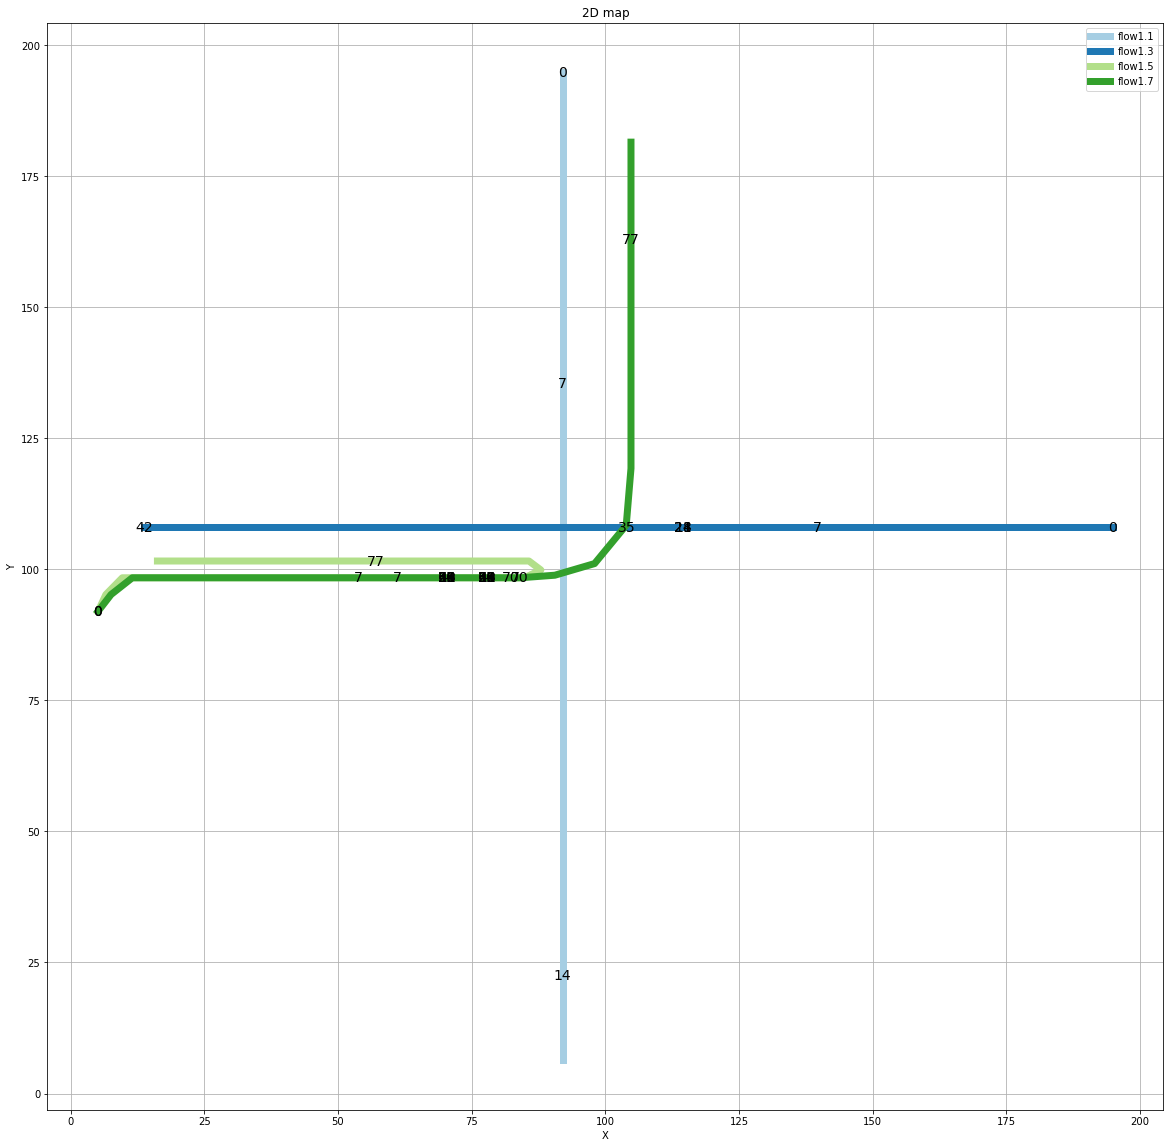

In [9]:
# lets focus on fewer vehicles (test_veh) and reduce the number of timesteps we look at, for now
df_test_veh = mask_veh(df,test_veh)

df_test = mask_timestep(df_test_veh,list(df_test_veh.time.unique()))
plot_2D(df_test, palette = "Paired", 
                legend = "True", 
                grid = "True",
                figsize=(20,20),
                linewidth=7.0)

In [15]:
# here per each 
edge_creation_radius = 20
edge_maintenance_radius = 40
df_list = get_df_per_timestep(df_test, 
                            edge_creation_radius = edge_creation_radius,
                            edge_maintenance_radius = edge_maintenance_radius
                            )
df_alltimestep_all_distances = pd.concat(df_list)

In [16]:
df_alltimestep_all_distances

,timestep,veh_a,veh_b,"(xa,ya)","(xb,yb)",distance,edge_c,edge_m
0,6.00,flow1.1,flow1.3,"(92.0, 181.24)","(194.9, 108.0)",126.303237,0,0
0,7.00,flow1.1,flow1.3,"(92.0, 172.49)","(192.91, 108.0)",119.757205,0,0
0,8.00,flow1.1,flow1.3,"(92.0, 162.06)","(189.48, 108.0)",111.466739,0,0
0,9.00,flow1.1,flow1.3,"(92.0, 149.48)","(183.62, 108.0)",100.572436,0,0
0,10.00,flow1.1,flow1.3,"(92.0, 135.51)","(175.76, 108.0)",88.161997,0,0
...,...,...,...,...,...,...,...,...
0,86.00,flow1.5,flow1.7,"(67.14, 101.6)","(97.99, 101.11)",30.853891,0,1
0,87.00,flow1.5,flow1.7,"(57.04, 101.6)","(103.91, 108.43)",47.365027,0,0
0,88.00,flow1.5,flow1.7,"(45.32, 101.6)","(104.8, 119.26)",62.046321,0,0
0,89.00,flow1.5,flow1.7,"(31.89, 101.6)","(104.8, 131.96)",78.978464,0,0


In [17]:
df_complete = df_alltimestep_all_distances.copy(deep=True)

In [18]:
# df_subset = df_complete[ ((df_complete.veh_a == "f14.0") & (df_complete.veh_b == "f21.0"))]
# df_subset[30:55]

In [19]:
# def add_edge_info_per_veh(df):
#     merged_list = df.edge_c *10 + df.edge_m
#     l = len(merged_list)
#     edges_list = [False]* l
#     for i,e in enumerate(merged_list):
#         if e == 0:
#             edges_list[i:] = [False]*(l-i)
#         elif e == 11:
#             edges_list[i:] = [True]*(l-i)
#         else:
#             continue
#     df["edge"] = edges_list
#     return df

# def add_edge_info_per_df(df):

#     # all the unique combinations of vehicles veh_a, veh_b
#     combinations = list(set(zip(df.veh_a, df.veh_b)))

#     new_dfs = []
#     for combo in combinations:
#         print (combo)
#         veh_a,veh_b = combo
#         df_veh = df[(df.veh_a == veh_a) & (df.veh_b == veh_b)]
#         new_dfs.append(add_edge_info_per_veh(df_veh))
    
#     return pd.concat(new_dfs)

In [20]:
df_with_edges = add_edge_info_per_df(df_complete)
df_with_edges

('flow1.1', 'flow1.7')
('flow1.1', 'flow1.5')
('flow1.1', 'flow1.3')
('flow1.5', 'flow1.7')
('flow1.3', 'flow1.7')
('flow1.3', 'flow1.5')
<ipython-input-19-611877359534>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["edge"] = edges_list


,timestep,veh_a,veh_b,"(xa,ya)","(xb,yb)",distance,edge_c,edge_m,edge
2,14.00,flow1.1,flow1.7,"(92.0, 71.76)","(5.1, 92.0)",89.225936,0,0,False
2,15.00,flow1.1,flow1.7,"(92.0, 55.29)","(7.53, 95.2)",93.423707,0,0,False
2,16.00,flow1.1,flow1.7,"(92.0, 38.69)","(11.51, 98.4)",100.219380,0,0,False
2,17.00,flow1.1,flow1.7,"(92.0, 22.46)","(18.05, 98.4)",105.997576,0,0,False
2,18.00,flow1.1,flow1.7,"(92.0, 6.32)","(27.16, 98.4)",112.618613,0,0,False
...,...,...,...,...,...,...,...,...,...
0,44.00,flow1.3,flow1.5,"(75.07, 108.0)","(77.9, 98.4)",10.008441,1,1,True
0,45.00,flow1.3,flow1.5,"(61.61, 108.0)","(77.9, 98.4)",18.908308,1,1,True
0,46.00,flow1.3,flow1.5,"(46.17, 108.0)","(77.9, 98.4)",33.150459,0,1,True
0,47.00,flow1.3,flow1.5,"(30.2, 108.0)","(77.9, 98.4)",48.656449,0,0,False


In [21]:
df_with_edges.to_pickle("../data/dataframes/df_with_edges.pkl")

In [68]:
smaller_df = df_with_edges[df_with_edges.timestep.isin(['2.00', '3.00', '4.00', '5.00',
       '6.00', '7.00', '8.00', '9.00', '10.00', '11.00', '12.00', '13.00',
       '14.00', '15.00', '16.00', '17.00', '18.00', '19.00', '20.00',
       '21.00', '22.00', '23.00', '24.00', '25.00', '26.00', '27.00',
       '28.00', '29.00', '30.00', '31.00', '32.00', '33.00', '34.00',
       '35.00', '36.00', '37.00', '38.00', '39.00', '40.00', '41.00',
       '42.00', '43.00', '44.00', '45.00', '46.00', '47.00', '48.00',
       '49.00', '50.00', '51.00', '52.00', '53.00', '54.00', '55.00',
       '56.00', '57.00', '58.00', '59.00', '60.00', '61.00', '62.00',
       '63.00', '64.00', '65.00', '66.00', '67.00', '68.00', '69.00',
       '70.00', '71.00', '72.00', '73.00', '74.00', '75.00', '76.00',
       '77.00', '78.00', '79.00', '80.00', '81.00', '82.00', '83.00',
       '84.00', '85.00', '86.00', '87.00', '1.00', '0.00', '88.00',
       '89.00', '90.00', '91.00', '92.00', '93.00'])]

In [69]:
smaller_df.to_pickle("../data/dataframes/smaller_df.pkl")

In [70]:
df = pd.read_pickle("../data/dataframes/smaller_df.pkl")
#df = pd.read_pickle("../data/dataframes/df_with_edges.pkl")
df

,timestep,veh_a,veh_b,"(xa,ya)","(xb,yb)",distance,edge_c,edge_m,edge
4,2.00,f21.0,f21.1,"(997.21, 518.0)","(1004.9, 518.0)",7.690000,1,1,True
4,3.00,f21.0,f21.1,"(989.58, 518.0)","(1004.1, 518.0)",14.520000,1,1,True
4,4.00,f21.0,f21.1,"(979.72, 518.0)","(1001.78, 518.0)",22.060000,1,1,True
4,5.00,f21.0,f21.1,"(968.2, 518.0)","(997.87, 518.0)",29.670000,1,1,True
4,6.00,f21.0,f21.1,"(954.47, 518.0)","(991.53, 518.0)",37.060000,0,1,True
...,...,...,...,...,...,...,...,...,...
5,73.00,f21.0,f34.0,"(208.03, 518.0)","(518.0, 963.27)",542.537348,0,0,False
5,74.00,f21.0,f34.0,"(198.19, 518.0)","(518.0, 974.57)",557.435737,0,0,False
5,75.00,f21.0,f34.0,"(189.01, 518.0)","(518.0, 985.57)",571.713324,0,0,False
5,76.00,f21.0,f34.0,"(179.36, 518.0)","(518.0, 996.29)",586.036154,0,0,False


In [83]:
unique_veh = np.unique(df[['veh_a','veh_b']].values).tolist()

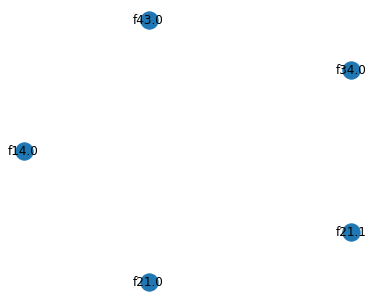

In [93]:
import networkx as nx
from matplotlib.pyplot import figure
G = nx.Graph()
G.add_nodes_from(unique_veh)
figure(figsize=(5, 4))
nx.draw_shell(G, with_labels=True)
time.sleep(0.1)
SAVE_TEMP = f"../data/figures/graph/{get_date()}{get_timestamp()}"
Path(SAVE_TEMP).mkdir(parents=True, exist_ok=True)

In [117]:
for i,timestep in enumerate(df.timestep.unique()):
    #time.sleep(0.1)
    #print (timestep)
    mask = (df.edge == True) & (df.timestep == timestep)
    elist = [(row.veh_a,row.veh_b,distance) 
                for index, row in df[mask].iterrows()]
    H = G.copy()
    H.add_weighted_edges_from(elist)

    figure(figsize=(5, 4));
    nx.draw_shell(H, with_labels=True)
    t = pad(i,minl= 6)
    plt.title(f"timestep: {t}",y=1.0, pad=-14, loc='right')
    plt.savefig(os.path.join(SAVE_TEMP,f"filename{t}.png"));
    # clearing the current plot
    plt.clf();

<ipython-input-117-ac568f6be37a>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(5, 4));


<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

In [120]:
titleGif = build_gif(SAVE_TEMP,f"{get_date()}{get_timestamp()}_graph_94_frames",search = "", fps=1)

100%|██████████| 94/94 [00:01<00:00, 66.48it/s]


## full dataset

In [16]:
df

,time,vehID,X,Y,yaw,type,speed,pos,lane,slope
0,0.00,0,92.0,194.90,180.0,DEFAULT_VEHTYPE,0.00,5.10,4i_0,0.0
1,1.00,0,92.0,192.98,180.0,DEFAULT_VEHTYPE,1.92,7.02,4i_0,0.0
2,2.00,0,92.0,189.34,180.0,DEFAULT_VEHTYPE,3.64,10.66,4i_0,0.0
3,3.00,0,92.0,183.70,180.0,DEFAULT_VEHTYPE,5.64,16.30,4i_0,0.0
4,3.00,1,92.0,194.90,180.0,DEFAULT_VEHTYPE,0.00,5.10,4i_0,0.0
...,...,...,...,...,...,...,...,...,...,...
23272,2350.00,499,92.0,49.14,180.0,DEFAULT_VEHTYPE,17.39,37.26,3o_0,0.0
23273,2351.00,488,92.0,1.10,180.0,DEFAULT_VEHTYPE,16.80,85.30,3o_0,0.0
23274,2351.00,498,95.2,3.61,180.0,DEFAULT_VEHTYPE,19.08,82.79,3o_1,0.0
23275,2351.00,499,92.0,31.56,180.0,DEFAULT_VEHTYPE,17.58,54.84,3o_0,0.0
